# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("decathlon_clean.csv")

In [3]:
df

,product_name,brand,star_rating,MRP(in rs),sale_price(in rs),Quantity,amount,transaction_Id,transaction date,User_ID,Cust_name,Gender,Age,recency,frequency,monetary
0,100 Base Layer Ski Pants Women's,Wedze,4.4,836.2629,836.2629,3,2508.7887,156752,2022-05-01,1002903,Sanskriti,F,28,638,1,2508.7887
1,Thermal Underwear Base Layer Top Women's,Wedze,4.5,836.2629,669.6800,2,1339.3600,156753,2022-05-02,1000732,Kartik,F,35,16,2,5106.3100
2,100 Ski Jacket Men's,Wedze,4.6,3347.5629,2511.3000,1,2511.3000,156754,2022-05-03,1001990,Bindu,F,35,636,1,2511.3000
3,Forclaz Trek 500 Merino Wool Hiking Hat Adult,Forclaz,4.6,2091.9129,2091.9129,1,2091.9129,156755,2022-05-04,1001425,Sudevi,M,16,635,1,2091.9129
4,Wedze FR100 Freeride Ski Jacket Women's,Wedze,4.5,9961.4900,5859.7000,3,17579.1000,156756,2022-05-05,1000588,Joni,M,28,633,2,40178.2887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,"MH K100, Category 3 Hiking Sunglasses, Kids'",Quechua,4.6,1087.3929,669.6800,2,1339.3600,157386,2024-01-25,1004682,Vishakha,F,27,4,2,6360.2858
635,Women's Cardio Training Fitness Shoes Mid 120,Domyos,4.4,2929.0129,2092.7500,1,2092.7500,157387,2024-01-26,1004791,Crebagga,F,19,3,1,2092.7500
636,Keepdry 100 Long-Sleeved Soccer Base Layer Top ',Kipsta,4.7,1087.3929,418.5500,3,1255.6500,157388,2024-01-27,1002181,Sweta,F,32,2,2,2929.8500
637,Adult Football Bottoms Essential - Black,Kipsta,4.6,2091.9129,1255.6500,2,2511.3000,157389,2024-01-28,1002109,Gelder,F,34,1,3,28126.5600


## Total Amount spent by Customers

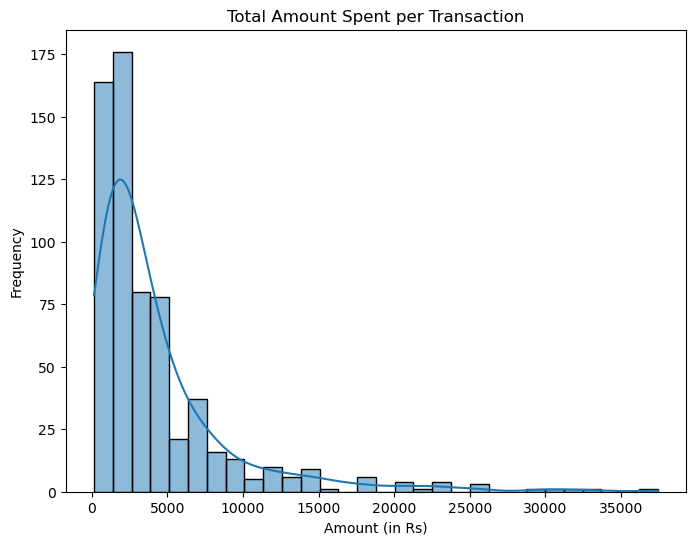

In [5]:
plt.figure(figsize=(8, 6))
sns.histplot(df['amount'], bins=30, kde=True)
plt.title('Total Amount Spent per Transaction')
plt.xlabel('Amount (in Rs)')
plt.ylabel('Frequency')
plt.show()

There are fewer transactions as the amount spent increases, indicating that most transactions are for smaller amounts.

## Agewise Distribution of Customers

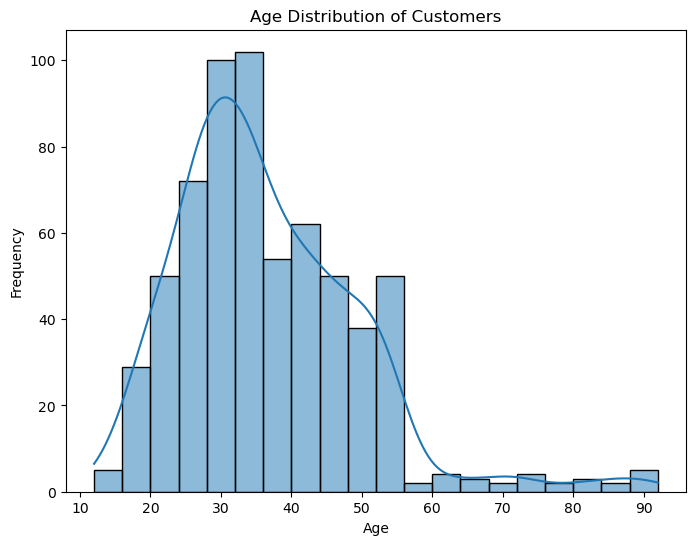

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The histogram suggests that most customers are concentrated in their 30s, with fewer customers in the younger and older age brackets.

# Sales by Gender

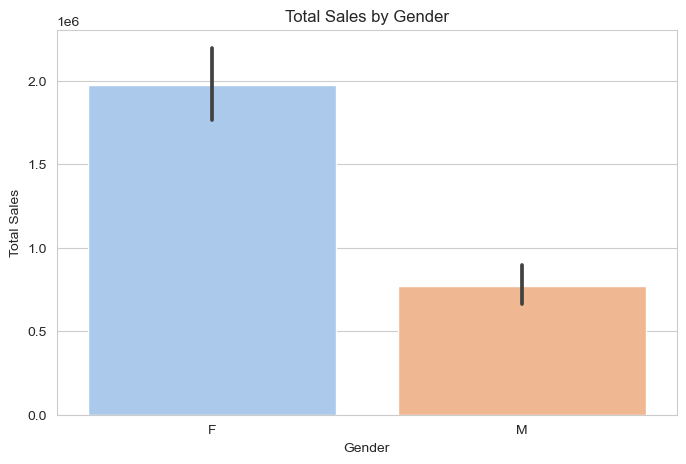

In [38]:
# Create the bar plot
plt.figure(figsize=(8, 5))
ax=sns.barplot(x='Gender', y='amount', data=df, estimator=sum, palette='pastel')
plt.xlabel('Gender')
plt.ylabel('Total Sales')
plt.title('Total Sales by Gender')
plt.show()

The chart highlights a notable disparity in total sales between genders, with females generating more sales than males.

## Distribution of Customer Ratings 

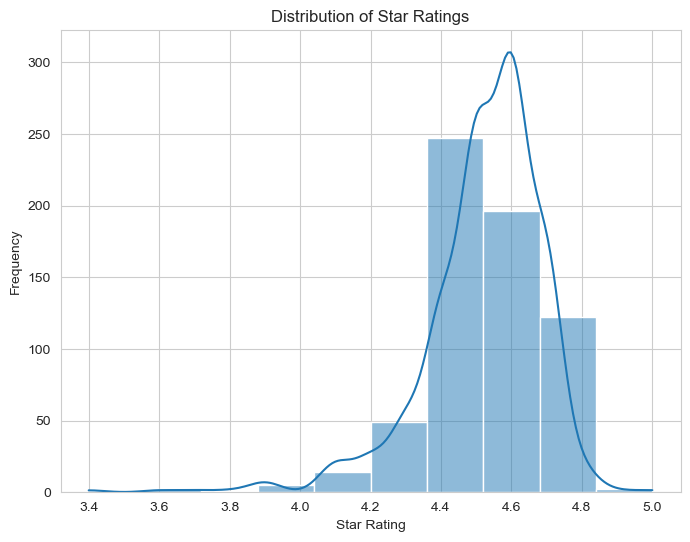

In [39]:
# Plot distribution of star ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['star_rating'], bins=10, kde=True)
plt.title('Distribution of Star Ratings')
plt.xlabel('Star Rating')
plt.ylabel('Frequency')
plt.show()

The distribution indicates a tendency for higher star ratings, with a significant concentration around 4.4 to 4.6, reflecting positive feedback overall.

## Most Popular Decathlon Brand Based on Sales

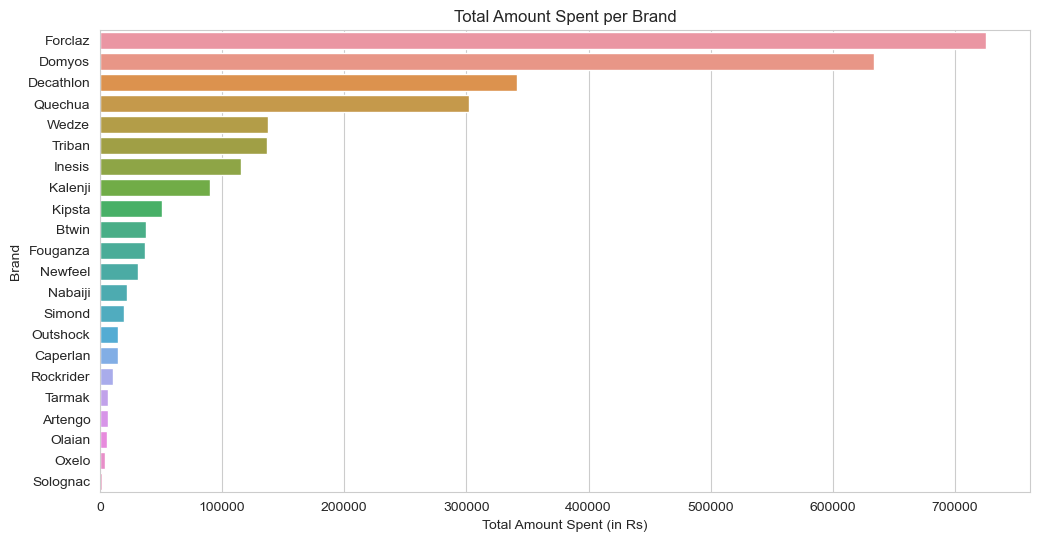

In [41]:
plt.figure(figsize=(12, 6))

# Aggregate total amount spent per brand
brand_amount = df.groupby('brand')['amount'].sum().reset_index()

# Sort the brands by total amount spent in descending order
brand_amount = brand_amount.sort_values(by='amount', ascending=False)

# Bar plot for total amount spent per brand
sns.barplot(x='amount', y='brand', data=brand_amount)
plt.title('Total Amount Spent per Brand')
plt.xlabel('Total Amount Spent (in Rs)')
plt.ylabel('Brand')
plt.show()

Forclaz has the highest total amount spent, significantly surpassing other brands. Domyos and Decathlon follow, with notable expenditures but much lower than Forclaz. Other brands like Quechua, Wedze, and Trek show moderate spending levels.

## Correlation Matrix Analysis

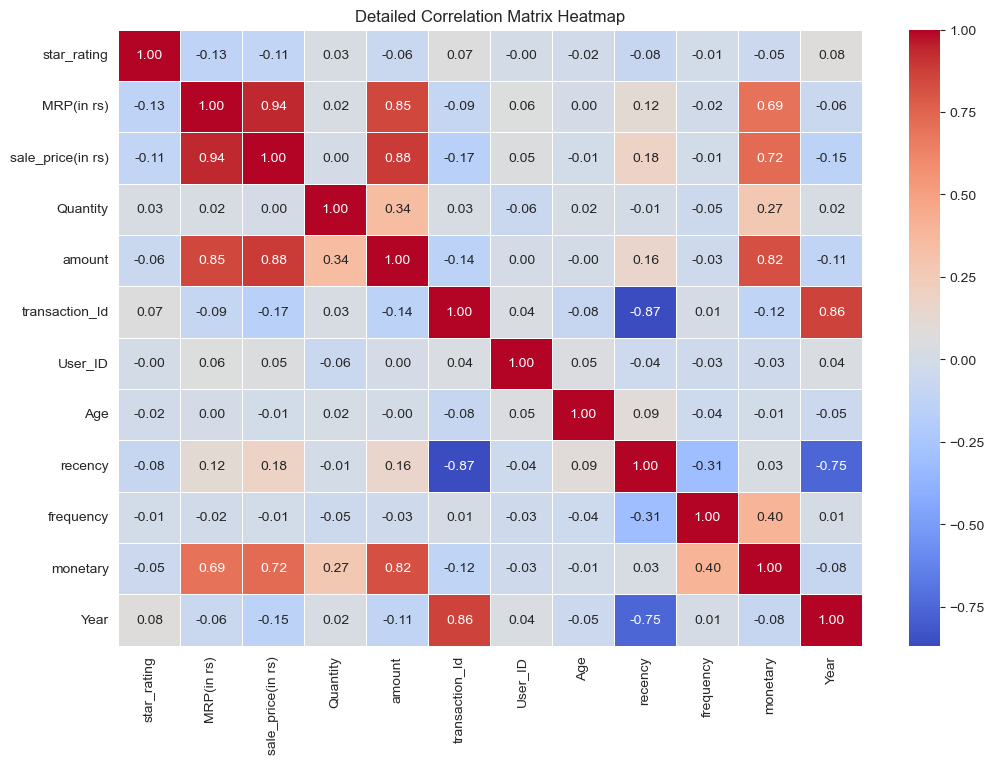

In [44]:
corr_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Detailed Correlation Matrix Heatmap')
plt.show()